In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [66]:
data_df = pd.read_csv("./Data.csv")
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


### ***Data Imputation (Missing data replacement)***

In [69]:
data_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [71]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_persent = missing_data / len(data_df) * 100
    print(f"Column {col}: missing {missing_persent}%")

Column Country: missing 0.0%
Column Age: missing 10.0%
Column Salary: missing 10.0%
Column Purchased: missing 0.0%


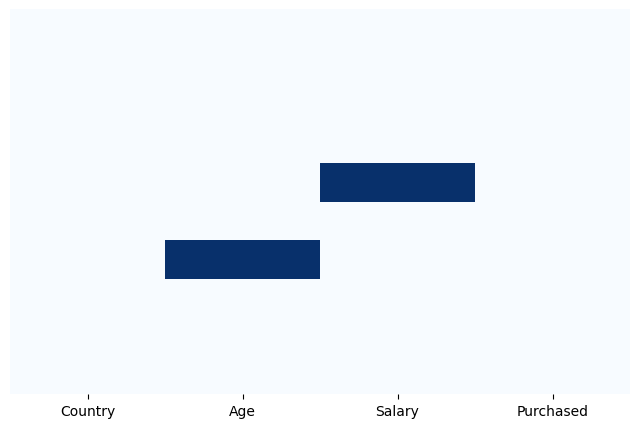

In [73]:
fig, ax = plt.subplots( figsize = (8,5))
sns.heatmap(data_df.isna() , cmap = "Blues", cbar = False , yticklabels = False);

In [75]:
data_df.isna().head()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False


 #### ***Split data***

In [78]:
X = data_df.iloc[:,:-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [80]:
y = data_df.iloc[:,-1:].values
y

array([['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes']], dtype=object)

In [84]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[: , 1:3])
X[:,1:3] = imputer.transform(X[: , 1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [86]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### ***Encode categorical data***

##### ***Encode independent variable (X)***

In [90]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 

In [92]:
ct = ColumnTransformer(transformers = [('encoder' , OneHotEncoder() , [0])], remainder = "passthrough") 
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

##### ***Encode dependent variable (Y)***

In [99]:
from sklearn.preprocessing import LabelEncoder 

In [101]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### ***Splitting the dataset***

In [125]:
from sklearn.model_selection import train_test_split 


In [127]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [129]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [131]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

### ***Feature Scaling***

In [134]:
from sklearn.preprocessing import StandardScaler

In [136]:
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [140]:
X_test[:,3:] = sc.transform(X_test[:,3:])
X_test

array([[0.0, 1.0, 0.0, -7.175636212782505, -7.416245698589758],
       [0.0, 0.0, 1.0, -8.056597917488327, -7.416725446024309]],
      dtype=object)